<a href="https://colab.research.google.com/github/SaadJavedQamar/Airline-Booking-System/blob/main/Attack_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pandas numpy scikit-learn seaborn matplotlib xgboost


Load the Dataset

In [9]:
import pandas as pd

# Load dataset (make sure you have the correct path)
df = pd.read_csv("KDDTrain+.txt", header=None)


Assign Proper Column Names

In [10]:
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "attack_type", "difficulty"
]

df.columns = columns


Convert Attack Types to Binary Labels

In [11]:
# Convert attack types to binary labels
df["attack_label"] = df["attack_type"].apply(lambda x: 0 if x == "normal" else 1)

# Drop the original attack_type column as it's no longer needed
df.drop(columns=["attack_type"], inplace=True)

# Check if labels are assigned correctly
df["attack_label"].value_counts()


,count
attack_label,
0,67343
1,58630


Encode Categorical Columns

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["protocol_type", "service", "flag"]

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows to confirm encoding
df.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False


Normalize Numerical Columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Select all columns except the label
features = df.drop(columns=["attack_label"])
labels = df["attack_label"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Add the attack_label column back
df_scaled["attack_label"] = labels

# Display the first few rows
df_scaled.head()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_label
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


Display Basic Information

In [14]:

print("Dataset Shape:", df_scaled.shape)
print("\nMissing Values:\n", df_scaled.isnull().sum().sum())  # Check for missing values
print("\nClass Distribution:\n", df_scaled["attack_label"].value_counts())


Dataset Shape: (125973, 124)

Missing Values:
 0

Class Distribution:
 attack_label
0    67343
1    58630
Name: count, dtype: int64


Plot Class Distribution

<ipython-input-15-766eb8857b31>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_scaled["attack_label"], palette="viridis")


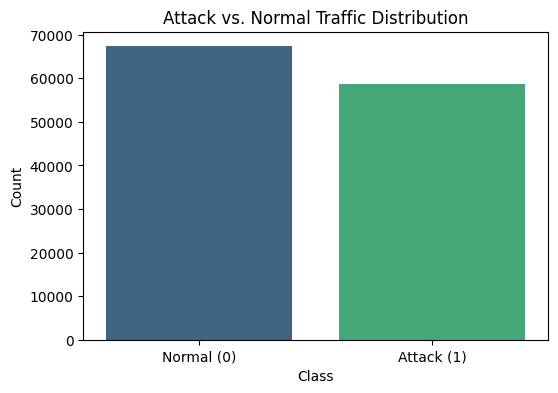

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot attack vs. normal distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_scaled["attack_label"], palette="viridis")
plt.xticks([0, 1], ["Normal (0)", "Attack (1)"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Attack vs. Normal Traffic Distribution")
plt.show()


Feature Selection (Correlation Analysis)

Top 10 Features Correlated with Attack Label:
attack_label                1.000000
dst_host_srv_serror_rate    0.654985
dst_host_serror_rate        0.651842
serror_rate                 0.650652
flag_S0                     0.650206
srv_serror_rate             0.648289
count                       0.576444
service_private             0.449720
dst_host_count              0.375052
srv_rerror_rate             0.253504
dst_host_srv_rerror_rate    0.253430
Name: attack_label, dtype: float64


<ipython-input-16-413f451c3401>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index[1:11], y=correlation.values[1:11], palette="coolwarm")


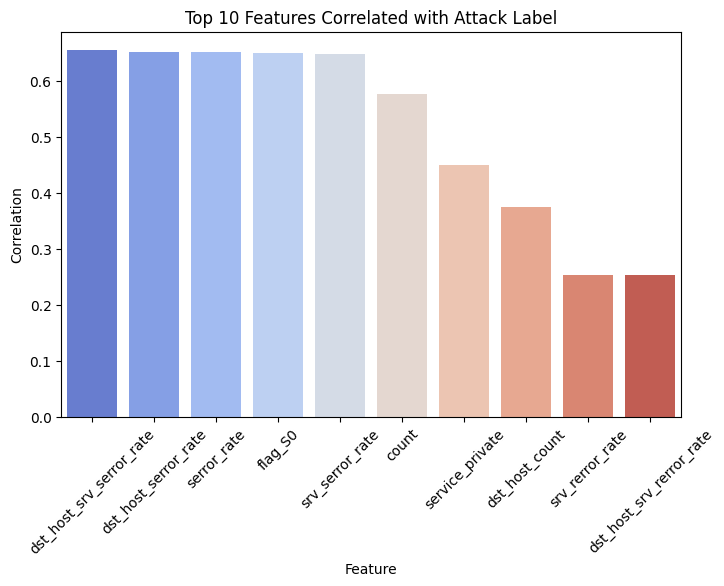

In [16]:
# Compute correlation with the attack label
correlation = df_scaled.corr()["attack_label"].sort_values(ascending=False)

# Display top 10 correlated features
print("Top 10 Features Correlated with Attack Label:")
print(correlation.head(11))

# Plot top correlated features
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.index[1:11], y=correlation.values[1:11], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Top 10 Features Correlated with Attack Label")
plt.show()


Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_scaled.drop(columns=["attack_label"])
y = df_scaled["attack_label"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset sizes
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (100778, 123)
Testing Set Size: (25195, 123)


Train a Random Forest Classifier

Random Forest Accuracy: 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



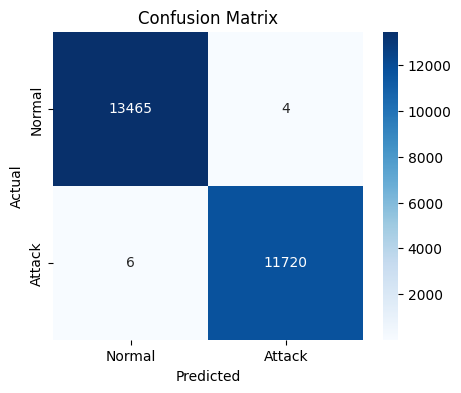

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Random Forest Accuracy: 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



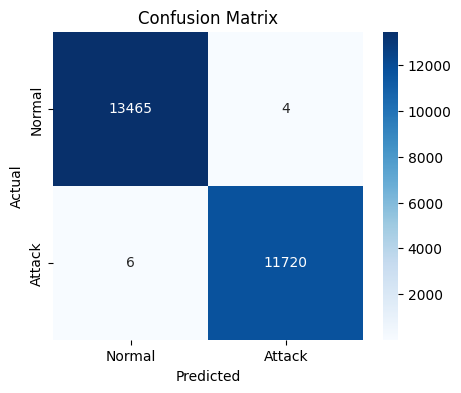

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Train XGBoost Model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



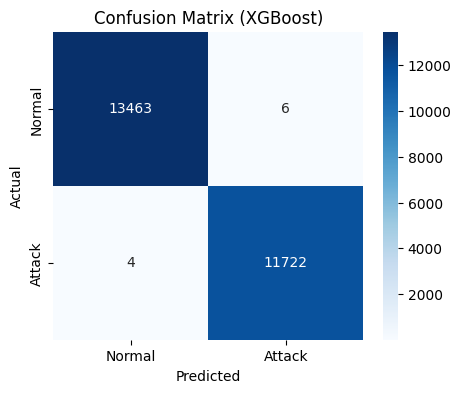

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (XGBoost)")
plt.show()


Train an SVM Model


SVM Accuracy: 0.9970

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       0.99      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



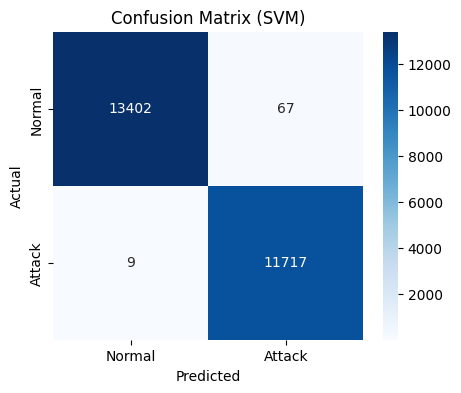

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize SVM model
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


Train the Decision Tree Model

Decision Tree Accuracy: 0.9992

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



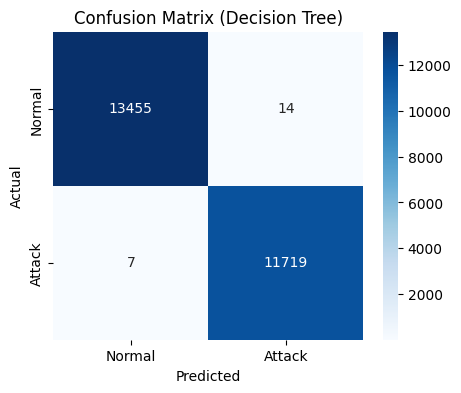

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()
